In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
label = LabelEncoder()
df["State"] = label.fit_transform(df["State"])
df["State"]

0     2
1     0
2     1
3     2
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    0
12    1
13    0
14    1
15    2
16    0
17    2
18    1
19    2
20    0
21    2
22    1
23    1
24    2
25    0
26    1
27    2
28    1
29    2
30    1
31    2
32    0
33    1
34    0
35    2
36    1
37    0
38    2
39    0
40    0
41    1
42    0
43    2
44    0
45    2
46    1
47    0
48    2
49    0
Name: State, dtype: int32

In [10]:
df = pd.get_dummies(df)
df

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [14]:
#Separate features and target variable
X = df.drop('Profit',axis = 1) # Independent variable
Y = df['Profit'] # Dependent variable

In [15]:
# Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
# Train the model
model = LinearRegression()
model.fit(X_train,Y_train)
# Predict on test data
Y_pred = model.predict(X_test)

In [19]:
r2 = r2_score(Y_test,Y_pred)
print(f"R2_Score {r2:.4f}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

R2_Score 0.8987
Intercept: 54343.29984897954
Coefficients: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02 -3.15260255e+02
  6.23532751e+02 -3.08272495e+02]


    Actual Profit  Predicted Profit
13      134307.35     126362.879083
39       81005.76      84608.453836
30       99937.59      99677.494251
45       64926.08      46357.460686
17      125370.37     128750.482885


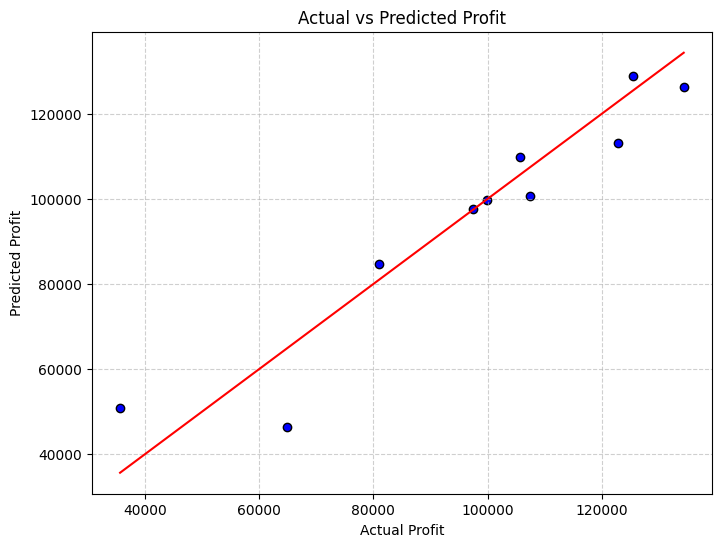

In [22]:
# Compare actual and predicted

comparison = pd.DataFrame({'Actual Profit':Y_test, 'Predicted Profit': Y_pred})
print(comparison.head())

#Visualization

plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred,color='blue',edgecolor='black')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='red')
plt.title("Actual vs Predicted Profit")
plt.xlabel('Actual Profit')
plt.ylabel("Predicted Profit")
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

In [23]:
df1 = pd.read_csv("insurance.csv")
df1.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df1.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
df1.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [26]:
df1 = pd.get_dummies(df1)
df1

,index,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [31]:
X = df1.drop('charges',axis=1)
Y = df1['charges']

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test,Y_pred)
print(f"R2_Score {r2:.4f}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

R2_Score 0.7684
Intercept: -1535.12471363441
Coefficients: [ 5.92868206e-01  2.61653955e+02  3.49728169e+02  4.17976009e+02
 -5.80490121e+01  5.80490121e+01 -1.18056425e+04  1.18056425e+04
  5.95211296e+02  1.03303480e+02 -3.70616530e+02 -3.27898247e+02]
